#***What is PCA?***#


PCA is a dimention reduction technique which is work on varrience of the dataset. The main idea behind PCA is to figure out patterns and correlations among various features in the data set. On finding a strong correlation between different variables, a final decision is made about reducing the dimensions of the data in such a way that the significant data is still retained.

#Step By Step Computation Of PCA#
The below steps need to be followed to perform dimensionality reduction using PCA:

*Standardization of the data*

*1.Computing the covariance matrix*

*2.Calculating the eigenvectors and eigenvalues*

*3.Computing the Principal Components*

*4.Reducing the dimensions of the data set*

we have to import some libreary.

[***#Click Here for Dataset#***](https://drive.google.com/file/d/1MgK5APOIHLy7oYRNQLMSdD8t0hRaHvIb/view?usp=sharing)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import diag
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
mk = pd.read_csv("/content/drive/MyDrive/DATA SETS/Pokemon (1).csv")
mk.head(10)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
5       80       65     80           1      False  
6      109       85    100           1      False  
7      130       85    100           1      False  
8      159      115    100           1      False  
9       50       64     43           1      False

In [32]:
mk.dropna(axis=0,inplace=True)

In [33]:
mk

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
6      6              Charizard     Fire  Flying    534  78      84       78   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
6        109       85    100           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[414 rows x 13 columns]

WE can se here in our data some column is numerical and some column is catogorical  so we have to transform in to standard format so we will use Labelencoder from sklearn.preprocessing. 


In [34]:
from sklearn import preprocessing # we have imported preprocessing from sklearn library.
le = preprocessing.LabelEncoder()
mk['Name']=le.fit_transform(mk['Name'])
mk['Type 1']=le.fit_transform(mk['Type 1'])
mk['Type 2']=le.fit_transform(mk['Type 2'])
mk['Legendary']=le.fit_transform(mk['Legendary'])
print(mk)

       #  Name  Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0      1    42       9      13    318  45      49       49       65       65   
1      2   166       9      13    405  60      62       63       80       80   
2      3   379       9      13    525  80      82       83      100      100   
3      3   380       9      13    625  80     100      123      122      120   
6      6    52       6       7    534  78      84       78      109       85   
..   ...   ...     ...     ...    ...  ..     ...      ...      ...      ...   
795  719    78      15       4    600  50     100      150      100      150   
796  719    79      15       4    700  50     160      110      160      110   
797  720   155      14       8    600  80     110       60      150      130   
798  720   156      14       1    680  80     160       60      170      130   
799  721   388       6      17    600  80     110      120      130       90   

     Speed  Generation  Legendary  
0  

#Our vatriable value is fluctuated  somewhere high and somewhere low so we have to standardize the value then we will use StandardScaler From Sklearn.Preprocessing#



In [35]:
from sklearn.preprocessing import StandardScaler # StandardScaler imported from sklearn.preprocessing.
scaler = StandardScaler()
X = scaler.fit_transform(mk) # we fit the modelin dataset.
X


array([[-1.76667495, -1.37644053, -0.02702776, ..., -0.89565575,
        -1.45131131, -0.32703497],
       [-1.76197091, -0.33888049, -0.02702776, ..., -0.36909869,
        -1.45131131, -0.32703497],
       [-1.75726687,  1.44337988, -0.02702776, ...,  0.33297739,
        -1.45131131, -0.32703497],
       ...,
       [ 1.615532  , -0.43092211,  0.82066111, ..., -0.01806065,
         1.55892357,  3.05777697],
       [ 1.615532  , -0.42255469,  0.82066111, ...,  0.33297739,
         1.55892357,  3.05777697],
       [ 1.62023605,  1.51868666, -0.53564109, ..., -0.01806065,
         1.55892357,  3.05777697]])

#***Now we use PCA for dimentions reduction.So we have imported PCA form sklearn.decomposition ther are 13 features in data set but we want to decompose in  7 dimentions so we use n_components of pca.***#

In [36]:
pca = PCA(n_components=7) # it will transform the existing data set into new dimensioans called PCs
pca.fit(mk) # we fit the model in dataset
data_new = pca.transform(mk)
print(data_new.shape,data_new)

(414, 7) [[ 3.85404225e+02 -5.58076379e+01 -1.97166817e+02 ...  1.83787332e+01
  -5.54386245e+00  4.32019784e+00]
 [ 3.77045302e+02  4.72323266e+00 -5.42224767e+01 ...  2.01140259e+01
  -2.88949326e+00 -7.94579742e-01]
 [ 3.67340727e+02  7.84062657e+01  1.83672362e+02 ...  2.03618401e+01
  -1.10992681e-02 -6.76762426e+00]
 ...
 [-3.61712755e+02  1.19896863e+02 -1.13549350e+01 ...  4.54031073e+01
  -2.87842886e+01  5.42311872e-01]
 [-3.72761240e+02  2.05146634e+02  1.05314843e+01 ...  1.91473603e+01
  -3.83622813e+01  1.45815217e+01]
 [-3.54680791e+02  6.34669839e+01  2.15005870e+02 ...  1.19982325e+01
  -2.23456187e+01  2.65525341e+01]]


In [37]:
print(pca.components_)

[[-9.91497517e-01  3.50050096e-02  2.65851822e-03  2.71629496e-03
  -1.15493890e-01 -1.70810572e-02 -2.58281724e-02 -2.06742874e-02
  -1.93730522e-02 -1.79278027e-02 -1.46095181e-02 -7.58220552e-03
  -3.26981979e-04]
 [-1.29625092e-01 -2.37405179e-01  3.12224701e-04 -2.13127410e-03
   8.88428295e-01  1.10294331e-01  1.89412693e-01  1.42122806e-01
   1.88933891e-01  1.42796467e-01  1.14868107e-01 -1.79059716e-03
   1.00334130e-03]
 [ 4.01344264e-03  9.70604446e-01 -5.60731665e-03 -6.94971598e-04
   2.22514846e-01  3.26966321e-02  3.66205987e-02  3.78976917e-02
   4.34907004e-02  3.09173800e-02  4.08918429e-02 -1.90458785e-04
   4.93076411e-04]
 [-2.89678443e-03  4.41730428e-03  2.37622667e-02  3.74693672e-02
   2.78262788e-03 -7.18008244e-02 -6.03563604e-02  7.31170039e-01
  -3.39556255e-01  2.63036961e-01 -5.19710933e-01 -6.72946853e-04
  -1.03968883e-03]
 [ 4.11551471e-03 -1.96478825e-03 -4.98413121e-03  1.53924573e-02
   4.72999033e-03 -1.06908773e-01 -7.11611366e-01 -6.91291802e-02


#*** what is Cumsum***#

#Cumsum is the cumulative sum of differences between the values or variable
.#

In [38]:
from numpy.ma.core import cumsum # we use cumsum for check dimention reduction
print(pca.explained_variance_ratio_*100)
print(cumsum(pca.explained_variance_ratio_*100))

[57.42808232 21.11945263 17.72090691  1.39003547  0.966524    0.59258939
  0.40931873]
[57.42808232 78.54753495 96.26844186 97.65847733 98.62500132 99.21759072
 99.62690945]


Plotting scree plot  for see the how manny PC are there

Text(0.5, 1.0, 'Scree plot')

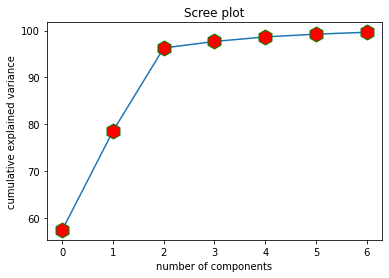

In [39]:
variance_explained=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100) # cummilative variance
plt.plot(variance_explained,marker='h',mfc='r',mec='g',ms='15')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree plot')

#***Singular Value Decomposition***#

***Singular Value Decomposition, or SVD, has a wide array of applications. These include dimensionality reduction, image compression, and denoising data. In essence, SVD states that a matrix can be represented as the product of three other matrices.***

SVD is an algorithm that factors an m x n matrix, M, of real or complex values into three component matrices, where the factorization has the form USV*. U is an m x p matrix. 

S is a p x p diagonal matrix. V is an n x p matrix, with V* being the transpose of V, a p x n matrix, or the conjugate transpose if M contains complex values. The value p is called the rank. The diagonal entries of S are referred to as the singular values of M. The columns of U are typically called the left-singular vectors of M, and the columns of V are called the right-singular vectors of M.

In [40]:
print(mk) # from above 


       #  Name  Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0      1    42       9      13    318  45      49       49       65       65   
1      2   166       9      13    405  60      62       63       80       80   
2      3   379       9      13    525  80      82       83      100      100   
3      3   380       9      13    625  80     100      123      122      120   
6      6    52       6       7    534  78      84       78      109       85   
..   ...   ...     ...     ...    ...  ..     ...      ...      ...      ...   
795  719    78      15       4    600  50     100      150      100      150   
796  719    79      15       4    700  50     160      110      160      110   
797  720   155      14       8    600  80     110       60      150      130   
798  720   156      14       1    680  80     160       60      170      130   
799  721   388       6      17    600  80     110      120      130       90   

     Speed  Generation  Legendary  
0  

In [41]:
from sklearn.preprocessing import StandardScaler # StandardScaler imported from sklearn.preprocessing.
scaler = StandardScaler()
X = scaler.fit_transform(mk) # we fit the modelin dataset.
X

array([[-1.76667495, -1.37644053, -0.02702776, ..., -0.89565575,
        -1.45131131, -0.32703497],
       [-1.76197091, -0.33888049, -0.02702776, ..., -0.36909869,
        -1.45131131, -0.32703497],
       [-1.75726687,  1.44337988, -0.02702776, ...,  0.33297739,
        -1.45131131, -0.32703497],
       ...,
       [ 1.615532  , -0.43092211,  0.82066111, ..., -0.01806065,
         1.55892357,  3.05777697],
       [ 1.615532  , -0.42255469,  0.82066111, ...,  0.33297739,
         1.55892357,  3.05777697],
       [ 1.62023605,  1.51868666, -0.53564109, ..., -0.01806065,
         1.55892357,  3.05777697]])

In [42]:
old_dataset=X # X is scalered data 
old_dataset

array([[-1.76667495, -1.37644053, -0.02702776, ..., -0.89565575,
        -1.45131131, -0.32703497],
       [-1.76197091, -0.33888049, -0.02702776, ..., -0.36909869,
        -1.45131131, -0.32703497],
       [-1.75726687,  1.44337988, -0.02702776, ...,  0.33297739,
        -1.45131131, -0.32703497],
       ...,
       [ 1.615532  , -0.43092211,  0.82066111, ..., -0.01806065,
         1.55892357,  3.05777697],
       [ 1.615532  , -0.42255469,  0.82066111, ...,  0.33297739,
         1.55892357,  3.05777697],
       [ 1.62023605,  1.51868666, -0.53564109, ..., -0.01806065,
         1.55892357,  3.05777697]])

#***What is Truncatedsvd ?***#

#Dimensionality reduction using truncated SVD (aka LSA). This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition.#

In [43]:
svd = TruncatedSVD(n_components =11)# n_component Means number of component we want  after reduction
result= svd.fit_transform(old_dataset)
print(result)

[[-2.55925484e+00 -1.90930744e+00  2.10702720e-01 ...  2.22751790e-01
   3.89474455e-02 -2.19349621e-01]
 [-1.27225231e+00 -2.19695144e+00  1.32676953e-01 ... -1.60906540e-01
  -1.41864523e-02 -2.23377621e-01]
 [ 4.89757197e-01 -2.60077354e+00 -3.65481486e-03 ... -6.71345852e-01
  -2.17564887e-02 -2.81370187e-01]
 ...
 [ 3.58874170e+00  1.73376312e+00  9.51230017e-02 ...  6.38400325e-01
   5.48869066e-01 -1.26311562e+00]
 [ 4.88152354e+00  1.78329024e+00 -1.03722172e+00 ...  8.29451602e-01
   1.37510831e+00 -1.69331903e+00]
 [ 3.22157368e+00  1.53175437e+00  1.43356755e+00 ...  1.25066144e+00
   6.05526875e-01  1.28903209e-01]]


**sigma** = svd( A ) returns a vector sigma containing the singular values of a symbolic matrix A .

 example. [ U , S , V ] = svd( A ) returns numeric unitary matrices U and V with the columns containing the singular vectors, and a diagonal matrix S containing the singular values.

 The decomposition is called the singular value decomposition, SVD, of A. In matrix notation A = UDV T where the columns of U and V consist of the left and right singular vectors, respectively, and D is a diagonal matrix whose diagonal entries are the singular values of A.

In [44]:
sigma = svd.singular_values_
v = svd.components_ # 
u = result/svd.singular_values_
# where result is transform value and is sigma is sigular value of svd 

print(sigma.shape)
print(v.shape)
print(u.shape)
print(sigma)
print(v)
print(u)

(11,)
(11, 13)
(414, 11)
[41.37857185 28.71910983 24.07002138 22.1548891  19.91155524 18.03212691
 17.24798535 15.79910778 15.22976539 12.72679877 10.33784034]
[[ 0.12831929 -0.02307393 -0.03073618 -0.07533107  0.48130336  0.34144102
   0.36277643  0.26168789  0.37019568  0.3308184   0.27460728  0.09475078
   0.31174921]
 [ 0.66930402 -0.01824435 -0.112042   -0.16103656 -0.10350085 -0.04828639
  -0.05363122 -0.10478099 -0.09142722 -0.10155608 -0.00879143  0.6817197
   0.05312358]
 [ 0.13216033 -0.12891886  0.11112234  0.51301819  0.04112155 -0.06459758
  -0.06621103  0.56673508 -0.13395452  0.29957447 -0.47813228  0.11762186
  -0.09384725]
 [-0.00964478  0.49862994 -0.71737691  0.39062188 -0.00711637 -0.16819256
  -0.10021879 -0.02917871  0.08758169  0.05965844  0.09435476 -0.01848851
   0.15604861]
 [-0.02144065 -0.82288037 -0.40402605  0.20496005  0.01855629 -0.16885552
   0.03051839 -0.15115289  0.14269616  0.01175337  0.1702087  -0.01637331
  -0.12160597]
 [-0.00533154  0.06582461 

***The diag function is numpy.diag(v, k=0) where v is an array that returns a diagonal matrix. Specifying v is important, but you can skip k.***

If v is an array, it returns a diagonal matrix 4x4 with the array elements as the diagonal matrix elements.

In [45]:
s= diag(svd.singular_values_) #it's creatr a diagonal matrix of svd.singular_value
data_new = np.dot(result, v)# here we  are doing dotproduct between result and v
data_new = np.round(data_new,2) # here we use round function for maximum 2 place of decimal
print(data_new)
print(old_dataset)

[[-1.62 -1.38 -0.03 ... -0.9  -1.59 -0.34]
 [-1.61 -0.34 -0.03 ... -0.37 -1.6  -0.34]
 [-1.59  1.44 -0.03 ...  0.33 -1.62 -0.34]
 ...
 [ 1.67 -0.43  0.82 ... -0.02  1.5   3.05]
 [ 1.67 -0.42  0.82 ...  0.33  1.5   3.05]
 [ 1.71  1.52 -0.54 ... -0.02  1.47  3.05]]
[[-1.76667495 -1.37644053 -0.02702776 ... -0.89565575 -1.45131131
  -0.32703497]
 [-1.76197091 -0.33888049 -0.02702776 ... -0.36909869 -1.45131131
  -0.32703497]
 [-1.75726687  1.44337988 -0.02702776 ...  0.33297739 -1.45131131
  -0.32703497]
 ...
 [ 1.615532   -0.43092211  0.82066111 ... -0.01806065  1.55892357
   3.05777697]
 [ 1.615532   -0.42255469  0.82066111 ...  0.33297739  1.55892357
   3.05777697]
 [ 1.62023605  1.51868666 -0.53564109 ... -0.01806065  1.55892357
   3.05777697]]


***Finding the best rank for the given data set using Frobenius Norm. The Frobenius Norm has to be small***

***∣(A−B)F∣=∑ij(Aij−Bij)2−−−−−−−−−−−−−√ ***

Where A and B represents old and new data set respectively

In [46]:
data_diff = np.subtract(old_dataset, data_new)
data_squarediff = np.square(data_diff)
print('Frobenius Norm = ', np.sqrt(data_squarediff.sum()))


Frobenius Norm =  2.3197934974056467
